<a href="https://colab.research.google.com/github/Stephen-Raj-A/SDC-GENAI/blob/main/RandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Accuracy: 80.00%
Confusion Matrix:
[[7 3]
 [1 9]]

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.70      0.78        10
           1       0.75      0.90      0.82        10

    accuracy                           0.80        20
   macro avg       0.81      0.80      0.80        20
weighted avg       0.81      0.80      0.80        20



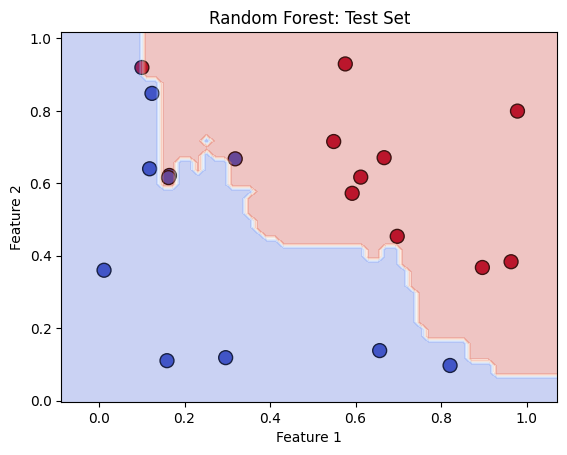

Feature Importances: [0.36328525 0.63671475]


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Generate some sample data for classification
np.random.seed(0)
X = np.random.rand(100, 2)  # Features (100 samples, 2 features)
y = (X[:, 0] + X[:, 1] > 1).astype(int)  # Binary target (1 if sum of features > 1 else 0)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Display the confusion matrix and classification report
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Plot the decision boundary
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='coolwarm', edgecolors='k', s=100)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Random Forest: Test Set')

# Create a grid of points to plot the decision boundary
x_min, x_max = X_test[:, 0].min() - 0.1, X_test[:, 0].max() + 0.1
y_min, y_max = X_test[:, 1].min() - 0.1, X_test[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

# Predict the class label for each point on the grid
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
plt.show()

# Print feature importance
print(f'Feature Importances: {model.feature_importances_}')
